# **Maternal Health Risk Classification**

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

### read dataset

In [2]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


### Information about dataset (shape, null columns, duplicated rows, ...)

In [3]:
df.shape

(1014, 7)

In [4]:
df.duplicated().sum()

562

In [5]:
# df = df.drop_duplicates().reset_index(drop=True)

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


### statistical information of features

In [8]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


### name of features

In [9]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

### size of each class

In [10]:
df.groupby('RiskLevel').size()

RiskLevel
high risk    272
low risk     406
mid risk     336
dtype: int64

### building array of features and the target as X, y, respectively

In [11]:
X = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']].values

In [12]:
y = df['RiskLevel']

We perform the encoding process using the `replace` function as well as a dictionary called `encoding_dict`:

In [13]:
encoding_dict = {'high risk':2 , 'low risk':0 , 'mid risk':1}

In [14]:
y.replace(encoding_dict, inplace=True)

In [15]:
y = y.values

### spliting data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### scaling data

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [18]:
X_test = sc.transform (X_test)

### building dataframe of accuracy

In [19]:
df_acc = pd.DataFrame(columns=['cv_acc', 'test_set_acc', 'train_set_acc'])

# DecisionTreeClassifier

The first model is the DecisionTreeClassifier. With different values of the depth parameter, we store the average cross_val_score accuracies in the DataFrame `df_tree` to see which parameter performs better.

In [20]:
from sklearn.tree import DecisionTreeClassifier

depth_list = [5, 7, 10, 12, 15, 18, 20, 22, 25]
df_tree = pd.DataFrame()
mean_list = []

for depth in depth_list:
    tree = DecisionTreeClassifier(criterion="entropy", max_depth = depth)
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    mean = scores.mean()
    mean_list.append(mean)
df_tree['depth'] = depth_list
df_tree['mean acc in cross_validation'] = mean_list

In [21]:
df_tree

,depth,mean acc in cross_validation
0,5,0.719269
1,7,0.744691
2,10,0.796823
3,12,0.815183
4,15,0.836320
5,18,0.844811
6,20,0.839147
7,22,0.841994
8,25,0.843392


It appears that a depth value of 15 is a good parameter. Now, we train our model on the training data and finally make predictions on the test data.

In [22]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 15)
tree.fit(X_train, y_train)
predict_tree = tree.predict(X_test)

Now, we evaluate the accuracy of our model on both the test and training datasets. Furthermore, we examine the confusion matrix.

Test set Accuracy:  0.7901639344262295
Train set Accuracy:  0.9393511988716502
[[85 18]
 [25 88]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       117
           1       0.73      0.76      0.74       112
           2       0.84      0.89      0.87        76

    accuracy                           0.79       305
   macro avg       0.80      0.80      0.80       305
weighted avg       0.79      0.79      0.79       305



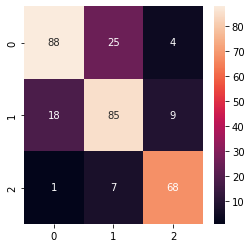

f1 is:  0.7981048008444888


In [23]:
from sklearn import metrics

test_set_acc_tree = metrics.accuracy_score(y_test, predict_tree)
train_set_acc_tree = metrics.accuracy_score(y_train, tree.predict(X_train))

print("Test set Accuracy: ", test_set_acc_tree)
print("Train set Accuracy: ", train_set_acc_tree)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print(confusion_matrix(y_test, predict_tree, labels=[1,0]))
print (classification_report(y_test, predict_tree))
cm = confusion_matrix(y_test, predict_tree)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()

from sklearn.metrics import f1_score
print('f1 is: ',f1_score(y_test, predict_tree, average='macro'))

As you can see, the accuracy on the test and training datasets is 80% and 94%, respectively. You can also visualize the confusion matrix information in the above chart. Additionally, the average accuracy percentage from cross-validation is 83%.

### adding acc to the dataframe

In [24]:
cv_acc = df_tree[df_tree.depth == 15]['mean acc in cross_validation'].values[0]
all_acc_tree = [cv_acc, test_set_acc_tree, train_set_acc_tree]

In [25]:
df_acc.loc['DecisionTreeClassifier'] = all_acc_tree

# KNeighborsClassifier

The next model is the KNeighborsClassifier, and its parameter is "n_neighbors." Again, we choose the best parameter using the average accuracy from cross-validation.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors_list = [2,3,4,5,6,7,8,9,10]
df_knn = pd.DataFrame()
mean_list = []

for k in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    mean = scores.mean()
    mean_list.append(mean)
df_knn['n_neighbors'] = n_neighbors_list
df_knn['mean acc in cross_validation'] = mean_list

In [27]:
df_knn

,n_neighbors,mean acc in cross_validation
0,2,0.709480
1,3,0.677035
2,4,0.661512
3,5,0.657277
4,6,0.661422
5,7,0.671322
6,8,0.665648
7,9,0.661422
8,10,0.664249


As you can see, the best parameter is 2. Now, we train this model on the training data and then make predictions on the test data.

In [28]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)

### accuracy and confusion matrix

Test set Accuracy:  0.6885245901639344
Train set Accuracy:  0.8575458392101551
[[ 52  54]
 [ 11 105]]
              precision    recall  f1-score   support

           0       0.62      0.90      0.73       117
           1       0.68      0.46      0.55       112
           2       0.88      0.70      0.78        76

    accuracy                           0.69       305
   macro avg       0.73      0.69      0.69       305
weighted avg       0.71      0.69      0.68       305



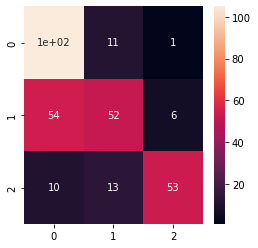

f1 is:  0.6889563294444395


In [29]:
test_set_acc_knn = metrics.accuracy_score(y_test, predict_knn)
train_set_acc_knn = metrics.accuracy_score(y_train, knn.predict(X_train))

print("Test set Accuracy: ", test_set_acc_knn)
print("Train set Accuracy: ", train_set_acc_knn)

print(confusion_matrix(y_test, predict_knn, labels=[1,0]))
print (classification_report(y_test, predict_knn))
cm = confusion_matrix(y_test, predict_knn)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()

print('f1 is: ',f1_score(y_test, predict_knn, average='macro'))

As you can see, the accuracy on the test and training data is 69% and 85%, respectively. You can also see the confusion matrix information in the above chart. Additionally, the average accuracy of cross-validation is 71%.

### adding to the dataframe

In [30]:
cv_acc = df_knn[df_knn.n_neighbors == 2]['mean acc in cross_validation'].values[0]
all_acc_knn = [cv_acc, test_set_acc_knn, train_set_acc_knn]

In [31]:
df_acc.loc['KNeighborsClassifier'] = all_acc_knn

# svm

It's now time for the SVM model. First, we examine which kernel has a higher cross-validation accuracy. So we have:

In [32]:
from sklearn import svm

mean_list = []
kernel_list = ['rbf', 'poly', 'linear', 'sigmoid']
for kernel in kernel_list:
    clf = svm.SVC(kernel=kernel)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    mean = scores.mean()
    mean_list.append(mean)
mean_list

[0.6995405054440116,
 0.6276995305164319,
 0.6459994006592749,
 0.5613724902607133]

As you can see, the `rbf` kernel has the highest accuracy. Now it's time to determine which value for the parameter `C` or the regularization parameter, is better. So we have:

In [33]:
C_s = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 2, 5, 10]
df_svm = pd.DataFrame()
mean_list = []

for C in C_s:
    clf = svm.SVC(kernel='rbf', C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    mean = scores.mean()
    mean_list.append(mean)
df_svm['C'] = C_s
df_svm['mean acc in cross_validation'] = mean_list

In [34]:
df_svm

,C,mean acc in cross_validation
0,0.001,0.407612
1,0.005,0.407612
2,0.010,0.407612
3,0.050,0.583958
4,0.100,0.634682
5,0.500,0.692498
6,0.800,0.695305
7,1.000,0.699541
8,2.000,0.702357
9,5.000,0.699541


Parameter "C=2" has a higher accuracy. Next, we train the model on the training data and then make predictions on the test data.

In [35]:
clf = svm.SVC(kernel='rbf', C=2)
clf.fit(X_train, y_train)
predict_svm = clf.predict(X_test)

### accuracy and confusion matrix

Test set Accuracy:  0.6950819672131148
Train set Accuracy:  0.7362482369534555
[[ 41  58]
 [  7 104]]
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       117
           1       0.76      0.37      0.49       112
           2       0.78      0.88      0.83        76

    accuracy                           0.70       305
   macro avg       0.72      0.71      0.69       305
weighted avg       0.71      0.70      0.67       305



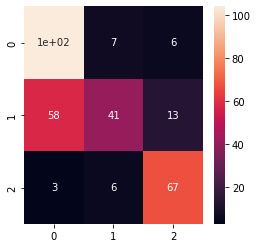

f1 is:  0.6862416833079626


In [36]:
test_set_acc_svm = metrics.accuracy_score(y_test, predict_svm)
train_set_acc_svm = metrics.accuracy_score(y_train, clf.predict(X_train))

print("Test set Accuracy: ", test_set_acc_svm)
print("Train set Accuracy: ", train_set_acc_svm)

print(confusion_matrix(y_test, predict_svm, labels=[1,0]))
print (classification_report(y_test, predict_svm))
cm = confusion_matrix(y_test, predict_svm)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()

print('f1 is: ',f1_score(y_test, predict_svm, average='macro'))

As you can see, the accuracy on the test and training data is 69% and 73%, respectively. You can also view the confusion matrix information in the above chart. Furthermore, the average accuracy of cross-validation is 70%.

### adding to dataframe

In [46]:
cv_acc = df_svm[df_svm.C == 2]['mean acc in cross_validation'].values[0]
all_acc_svm = [cv_acc, test_set_acc_svm, train_set_acc_svm]

In [47]:
df_acc.loc['svm'] = all_acc_svm

# RandomForestClassifier

This is the RandomForestClassifier model. We calculate the average accuracy scores using different values for the `max_depth` parameter and store them in the DataFrame `df_tree` to determine which parameter value is better.

In [48]:
from sklearn.ensemble import RandomForestClassifier

depth_list = [2, 4, 6, 8, 10, 12, 15, 20, 25]
df_forest = pd.DataFrame()
mean_list = []

for depth in depth_list:
    forest = RandomForestClassifier(criterion="entropy", max_depth = depth)
    scores = cross_val_score(forest, X_train, y_train, cv=5)
    mean = scores.mean()
    mean_list.append(mean)
df_forest['depth'] = depth_list
df_forest['mean acc in cross_validation'] = mean_list

In [49]:
df_forest

,depth,mean acc in cross_validation
0,2,0.636100
1,4,0.746119
2,6,0.760234
3,8,0.792678
4,10,0.837778
5,12,0.849046
6,15,0.849066
7,20,0.847638
8,25,0.851883


It seems that a `max_depth` parameter value of 15 is a good choice. Now, we train our model on the training data and, in the end, make predictions on the test data.

In [51]:
forest = RandomForestClassifier(criterion="entropy", max_depth = 15)
forest.fit(X_train, y_train)
predict_forest = forest.predict(X_test)

### accuracy and confusion matrix

Test set Accuracy:  0.8098360655737705
Train set Accuracy:  0.9449929478138223
[[87 16]
 [21 91]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       117
           1       0.77      0.78      0.77       112
           2       0.83      0.91      0.87        76

    accuracy                           0.81       305
   macro avg       0.81      0.82      0.82       305
weighted avg       0.81      0.81      0.81       305



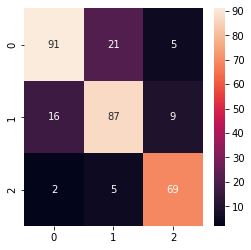

f1 is:  0.8155225320494982


In [52]:
test_set_acc_forest = metrics.accuracy_score(y_test, predict_forest)
train_set_acc_forest = metrics.accuracy_score(y_train, forest.predict(X_train))

print("Test set Accuracy: ", test_set_acc_forest)
print("Train set Accuracy: ", train_set_acc_forest)

print(confusion_matrix(y_test, predict_forest, labels=[1,0]))
print (classification_report(y_test, predict_forest))
cm = confusion_matrix(y_test, predict_forest)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()

print('f1 is: ',f1_score(y_test, predict_forest, average='macro'))

As you can see, the accuracy on the test and training data is 80% and 94%, respectively. You can also see the confusion matrix information in the above chart. Additionally, the average accuracy of cross-validation is 85%.

### adding to the dataframe

In [43]:
cv_acc = df_forest[df_forest.depth == 15]['mean acc in cross_validation'].values[0]
all_acc_forest = [cv_acc, test_set_acc_forest, train_set_acc_forest]

In [44]:
df_acc.loc['RandomForestClassifier'] = all_acc_forest

## Model Comparison

In the end, we want to determine which of our trained models performs better in predicting the dataset. As shown in the table below, we have recorded the accuracy values for the test and training datasets, as well as the cross-validation accuracy. In all cases, the RandomForestClassifier model demonstrates the highest accuracy. Therefore, we can conclude that we have found our best model.

| Model                   | Test Accuracy | Train Accuracy | Cross-Validation Accuracy |
|-------------------------|---------------|----------------|---------------------------|
| RandomForestClassifier  | 80%           | 94%            | 85%                       |
| DecisionTree            | 80%           | 94%            | 83%                       |
| KNeighborsClassifier    | 68%           | 85%            | 71%                       |
| SVM                     | 69%           | 73%            | 70%                       |

After that, the Decision Tree model performs as well as the RandomForest model. However, the KNN and SVM models did not perform well, achieving test accuracies of 68% and 69%, respectively, which is not acceptable.

The RandomForestClassifier model exhibits an accuracy of 94% on the training data, 80% on the test data, and a cross-validation average accuracy of 85%.

In conclusion, considering the gap between test and training accuracies, it can be said that this model suffers from overfitting. This issue can be addressed by adding more records. However, it should be noted that having 561 identical records or duplicates does not affect the overfitting problem.


In [53]:
df_acc

,cv_acc,test_set_acc,train_set_acc
DecisionTreeClassifier,0.836320,0.790164,0.939351
KNeighborsClassifier,0.709480,0.688525,0.857546
svm,0.702357,0.695082,0.736248
RandomForestClassifier,0.849036,0.809836,0.946403
